# EDA for Jigsaw Unintended Bias in Toxicity Classification Dataset
* https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data

# 1. Load dataset

In [2]:
# import libs
import os
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
        
sns.set_style("whitegrid")

In [3]:
# load raw data
dir = 'jigsaw-unintended-bias-in-toxicity-classification'
train_data = pd.read_csv(os.path.join(dir,'train.csv'))
test_data = pd.read_csv(os.path.join(dir,'test.csv'))

In [4]:
train_data.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,...,2006,rejected,0,0,0,0,0,0.0,0,4
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,...,2006,rejected,0,0,0,1,0,0.0,4,47


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1804874 entries, 0 to 1804873
Data columns (total 45 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   id                                   int64  
 1   target                               float64
 2   comment_text                         object 
 3   severe_toxicity                      float64
 4   obscene                              float64
 5   identity_attack                      float64
 6   insult                               float64
 7   threat                               float64
 8   asian                                float64
 9   atheist                              float64
 10  bisexual                             float64
 11  black                                float64
 12  buddhist                             float64
 13  christian                            float64
 14  female                               float64
 15  heterosexual                    

In [24]:
train_data.describe()

,id,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,3.738434e+06,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,2.445187e+06,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,5.984800e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,7.969752e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,5.223774e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,5.769854e+06,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,6.334010e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


# 2.features analysis
jigsaw dataset features can be divided into toxicity subtypes, subset of comments and metadata 

### 1) toxicity subtypes
- toxicity : severe_toxicity, obscene, threat, insult, identity_attack, sexual_explicit

### 2) subset of comments 
- gender : male, female, transgender, other_gender
- sexual_orientation : heterosexual, homosexual_gay_or_lesbian, bisexual, other_sexual_orientation
- religion : christian, jewish, muslim, hindu, buddhist, atheist, other_religion
- race : black, white, asian, latino, other_race_or_ethnicity
- disability : physical_disability, intellectual_or_learning_disability, psychiatric_or_mental_illness, other_disability

### 3) metadata
- Jigsaw's annotator : toxicity_annotator_count, identity_annotator_count
- Civil Comments : created_date, publication_id, parent_id, article_id, rating, funny, wow, sad, likes, disagree

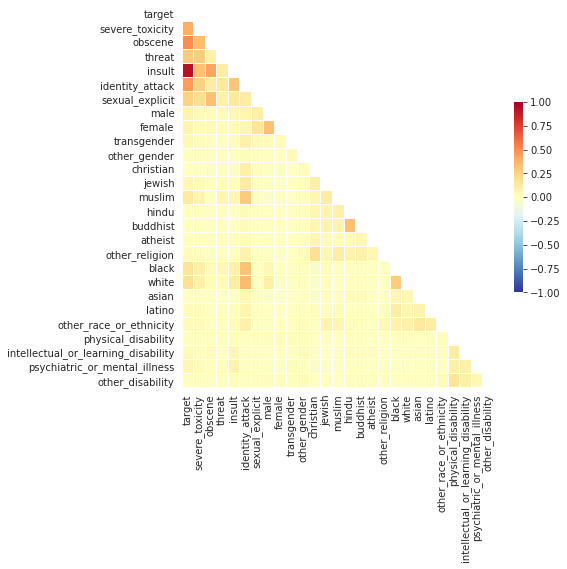

In [43]:
# features correlation
df = train_data[['target','comment_text',\
                    'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit',\
                    'male', 'female', 'transgender', 'other_gender',\
                    'christian', 'jewish', 'muslim', 'hindu', 'buddhist', 'atheist', 'other_religion',\
                    'black', 'white', 'asian', 'latino', 'other_race_or_ethnicity',\
                    'physical_disability', 'intellectual_or_learning_disability', 'psychiatric_or_mental_illness', 'other_disability']]
corr = df.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(corr, 
            cmap = 'RdYlBu_r', 
            annot = False,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

<AxesSubplot:>

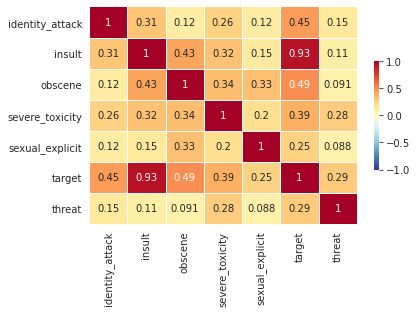

In [37]:
# corr of toxicity subtypes
df_toxicity = train_data[['id','target','severe_toxicity','obscene','identity_attack','insult','threat', 'sexual_explicit']]
sns.heatmap(df_toxicity[df_toxicity.columns.difference(['id'])].corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

<AxesSubplot:>

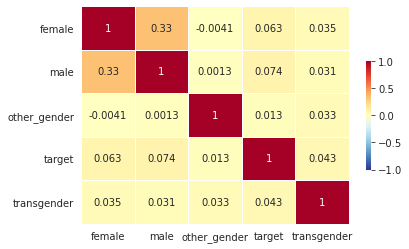

In [38]:
# corr of gender
df_toxicity = train_data[['id','target','male', 'female', 'transgender', 'other_gender']]
sns.heatmap(df_toxicity[df_toxicity.columns.difference(['id'])].corr(), 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  

In [14]:
# check text and toxicity values
df = train_data[['target','comment_text',\
                    'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack', 'sexual_explicit']]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

df = df.sort_values(by=['severe_toxicity'], ascending=False)
df.head(100)

,target,comment_text,severe_toxicity,obscene,threat,insult,identity_attack,sexual_explicit
1377740,1.000000,"Awesome! Lets cut the head off hate! Lets stab it and burn its house down! lets march together and beat hate with rocks and clubs and run out out of town! Hooray for us for showing hate we will not tolerate it and will kill or beat down any that oppose or stance against hate. \n\nYeah, that sounds like the good guys. Why is it so hard for people to admit that using violence to achieve a goal is not acceptable in a civil society?",1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
1532869,0.983501,You are murdering feckless SCUM. Your mother would slap you for being the piece of shit that you are. I hope you die in enormous pain from cancer in your asshole that makes you cry from the pain every time you shit you fucking subhuman scum......Fuck you. I would gladly cut your fucking balls off in a minute....go suck cock you piece of shit! Fuck you and your mother you sorry fuckin swill!,0.644363,0.970669,0.739688,0.978002,0.076994,0.857929
1443046,0.900000,".\n.\nIs there really a God ?\n... I once thought there was even after being RAPED Physically, Emotionally AND SPIRITUALLY by my pastor, til I witnessed how these so called mEN of God(Jorge et. al.) Damned their OWN Victims.\n.\nIf there is a God...and he has the conjones to let me into heaven, after having to Live this Hell wrought by these so called mEN of God, I'm going to give him a good swift kick in the arse !\n.\n.",0.600000,0.800000,0.500000,0.800000,0.400000,0.900000
1679044,0.990396,DOGS----\nEAT\nSHIT\nSLEEP\nBARK\n\nNIGERS\nEAT \nSHIT\nSLEEP\nRAPE\nMURDER\nSTEAL\n\nDOGS and NIGERS---PAST TIME to EXTERMINATE the FILTHY NON-HUMAN MONGRELS,0.591236,0.972389,0.819928,0.971789,0.909964,0.701080
1341396,0.973936,BURN THIS DOG RAPING WHITE NIGER ALIVE\nTIME for THESE NIGER LOVERS to DIE for THEIR CAUSE\nKILL THEM ALL REAL SLOW,0.569070,0.596872,0.892268,0.887055,0.917463,0.130321
44188,0.993733,Kill all the nigggers and pedophiles!,0.534819,0.349582,0.951950,0.776462,0.951253,0.057799
1370031,0.912921,The righteous ALT LEFT will eradicate fascist inbred redneck white supremacists like cockroaches. We will hunt them down like pigs and lynch them in our town squares and cities. We will gut them as they emerge from their backwoods swamps. Be warned white supremacist/nationalist scum. We will kill you and burn down your homes and destroy you and your families. The righteous ALT LEFT will cut your filthy throats in your homes in fort of your children.,0.503511,0.301264,0.818118,0.864466,0.791433,0.006320
1519955,0.949045,We will send wave after wave of American soldiers to storm the beaches of North Korea. We will kill until no North Korean remains standing. We will burn their cities and desecrate the graves of their ancestors. To war!,0.503185,0.101911,0.936306,0.222930,0.777070,0.012739
1230749,0.900000,"Sure you will find your peace. Blow yourself up, get 72 virgins; you won't care where you're buried. Just be sure to kill innocent women and children, like a good and true muslim, for extra special afterlife accommodation.",0.500000,0.100000,0.600000,0.400000,0.600000,0.000000
356751,0.800000,"""immiserate"": transitive verb, meaning to make miserable.\n\nDarn those Chinese and their inscrutable justice system! Imagine making accused spies feel miserable. You'd never see America or Canada doing that.",0.500000,0.800000,0.000000,0.800000,0.800000,0.000000
